<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>

# Introduction to Matplotlib and Line Plots

Estimated time needed: **20** minutes

## Objectives

After completing this lab you will be able to:

* Create Data Visualization with Python
* Use various Python libraries for visualization

## Introduction

The aim of these labs is to introduce you to Matplotlib and creating Line Plots. Please make sure that you have completed the previous courses based on python.

---

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1. [*pandas* Refresher](#0)<br>
2. [The Dataset: Immigration to Canada from 1980 to 2013](#1)<br>
3. [Visualizing Data using Matplotlib](#2)<br>
4. [Matplotlib: Standard Python Visualization Library](#3)<br>
5. [Line Plots](#4)
</div>

## *pandas* Refresher <a id="0"></a>

The courses heavily relies on *pandas* for data wrangling, analysis. Refresh your Pandas skill quickly with the lab on [Data pre-processing with Pandas](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/v4/DV0101EN-Exercise-Dataset-Preprocessing-Exploring-with-Pandas.ipynb)

*pandas* is an essential data analysis toolkit for Python.
<br>
#### We encourage you to spend some time and familiarize yourself with the *pandas* from the [website](http://pandas.pydata.org/)

### The Dataset: Immigration to Canada from 1980 - 2013 <a id="1"></a>

Dataset source: [International migration flows to and from selected countries - The 2015 revision](https://www.un.org/development/desa/pd/data/international-migration-flows). in this lab, we will focus on the Canadian immigration data.

We have already **pre-processed** the data, we will use the **clean data** saved in the csv format for this lab. The Canada Immigration dataset can be fetched from <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv">here</a>

Next, we'll do is install and import two key data analysis modules: *pandas*, *numpy* and *matplotlib*.

In [1]:
import pandas as pd # primary data structure library

In [2]:
df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')

print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


Let's view the top 5 rows of the dataset using the `head()` function.

In [3]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


Let's set `Country` as the index, it will help you to plot the charts easily, by refering to the country names as index value.

In [4]:
df_can.set_index('Country', inplace=True)
# Tip: The opposite of set is reset, i.e., df.reset_index()

In [6]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [7]:
# Optional: to remove the name of the index
# df_can.index.name = None

In [16]:
df_can.columns = list(map(str, df_can.columns)) # convert all column names to strings

In [ ]:
years = list(map(str, range(1980, 2014))) # useful for plotting later on
years

---
# Visualizing Data using Matplotlib <a id='2'></a>

## Matplotlib: Standard Python Visualization Library<a id='3'></a>

The primary plotting library we will explore in the course is [Matplotllib](http://matplotlib.org/). As mentioned on their website:
>Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shell, the jupyter notebook, web application servers, and four graphical user interface toolkits.

If you are aspiring to create impactful visualization with python, Matplotlib is an essential tool to have at your disposal.

## Matplotlib.Pyplot

One of the core aspects of Matplotlib is `matplotlib.pyplot`. It is Matplotlib's scripting layer which we studied in details in the videos about Matplotlib. Recall that it is a collection of command style functins that make Matplotlib work like MATLAB. Each `pyplot` function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc. In this lab, we will work with the scripting layer to learn how to generate line plots. In future labs, we will get to work with the Artist layer as well to experiment first hand how it differs from the scripting layer.

Let's start by importing `matplotlib` and `matplotlib.pyplot` as follows:

In [23]:
import matplotlib as mpl
import matplotlib.pyplot as plt

print('Matplotlib version: ', mpl.__version__)  # >= 2.0.0

Matplotlib version:  3.9.4


Check for available style in matplotlib

In [24]:
print(plt.style.available) # use bmh, classic,ggplot for big pictures; fivethirtyeight for small pictures
mpl.style.use(['ggplot']) # optional: for ggplot-like style

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


### Plotting in *pandas*

Fortunately, *pandas* has a built-in implementation of Matplotlib that we can use. Plotting in *pandas* is as simple as appending a `.plot()` method to a series or dataframe.

Documentation:

* [Plotting with Series](http://pandas.pydata.org/pandas-docs/stable/api.html#plotting)<br>
* [Plotting with Dataframe](http://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-plotting)


# Line Plots (Series/Dataframe)<a id="4"></a>

**What is a line plot and why use it?**

A line chart or line plot is a type of plot which displays information as a series of data points called 'markers' connected by straight line segments. It is a basic type of chart common in many fields. Use line plot when you have a continuous data set. These are best suited for trend-based visualizations of data over a period of time.

**Let's start with a case study:**

In 2010, Haiti suffered a catastrophic magnitude 7.0 earthquake. The quake caused widespread devastation and loss of life and about three million people were affected by this natural disaster. As part of Canada's humanitarian effort, the Government of Canada stepped up its effort in accepting refugees from Haiti. We can quickly visualize this effort using a Line plot:

**Question**: Plot a line graph of immigration from Haiti using `df.plot()`.



First, we will extract. the data series for Haiti.

In [28]:
# Let's use the years variable we created earlier to plot the data series of Haiti.
haiti = df_can.loc['Haiti', years]
haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

Next, we will plot a line plot by appending `.plot()` to the `haiti` dataframe.

<Axes: >

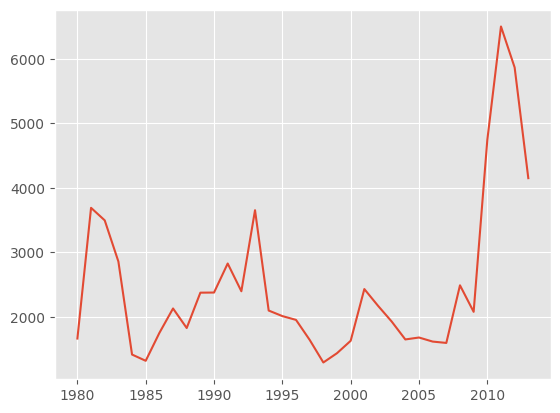

In [29]:
haiti.plot()

*pandas* automatically populated the x-axis with the index values (years), and the y-axis with the column values (population).

Also, let's label the x and y axis using `plt.title()`, `plt.ylabel()`, and `plt.xlabel()` as follows:

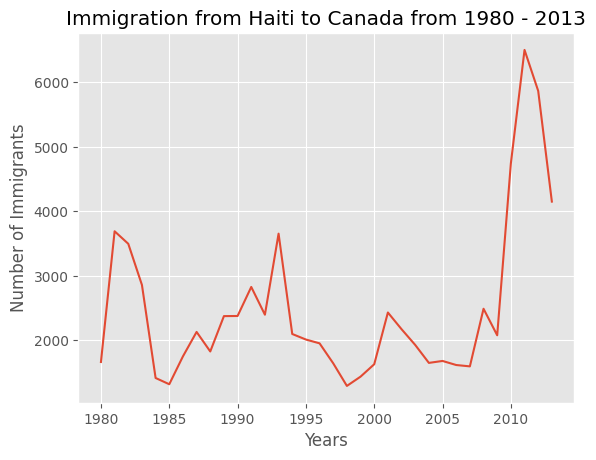

In [35]:
haiti.plot(kind='line')

plt.title('Immigration from Haiti to Canada from 1980 - 2013')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

We can clearly notice how number of immigrants from Haiti spiked up from 2010 as Canada stepped up its efforts to accept refugees from Haiti. Let's annotate this spike in the plot by using the plt.text() method.

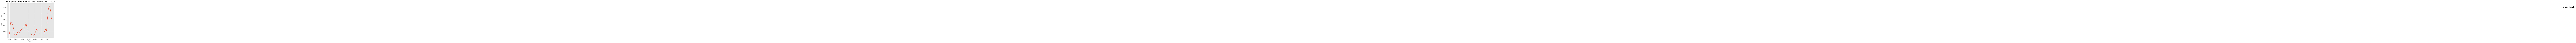

In [36]:
haiti.plot(kind='line')

plt.title('Immigration from Haiti to Canada from 1980 - 2013')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

# annotate the 2010 earthquake
# syntax: plt.text(x, y, 'text')
plt.text(2000, 6000, '2010 Earthquake', fontsize=12)

plt.show()

The plot won't show up, it's because the years are of type string. Let's change the type of the index values to integer first.

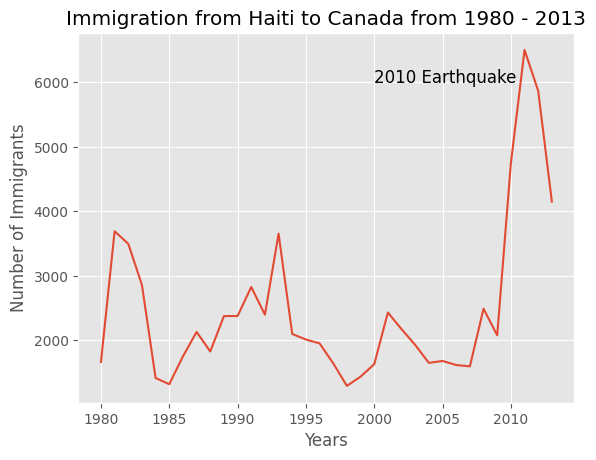

In [37]:
haiti.index = haiti.index.map(int) # convert the index values (years) to integer for plotting

haiti.plot(kind='line')

plt.title('Immigration from Haiti to Canada from 1980 - 2013')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

# annotate the 2010 earthquake
# syntax: plt.text(x, y, 'text')
plt.text(2000, 6000, '2010 Earthquake', fontsize=12)

plt.show()

With just a few lines of code, you were able to quickly identify and visualize the spike in immigration!

Quick note on x and y values in `plt.text(x, y, label)`:

Since the x-axis (years) is type 'integer', we specified x as a year. The y axis (number of immigrants) is type 'integer', so we can just specify the value y = 6000.
    
```python
    plt.text(2000, 6000, '2010 Earthquake') # years stored as type int
```

If the years were stored as type 'string', we would need to specify x as the index position of the year. Eg 20th index is year 2000 since it is the 20th year with a base year of 1980.

```python        
    plt.text(20, 6000, '2010 Earthquake') # years stored as type string
```

We will cover advanced annotation methods in later modules.

We can easily add more countries to line plot to make meaningful comparisons immigration from different countries.

**Question**: Let's compare the number of immigrants from India and China from 1980 to 2013.

STEP 1: Get the data set for China and India, and display the dataframe.

In [41]:
df_ci = df_can.loc[['China', 'India'], years]
df_ci.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087


STEP 2: Plot graph. We will explicitly specify line plot by passing in `kind` parameter to `plot()`.

<Axes: xlabel='Country'>

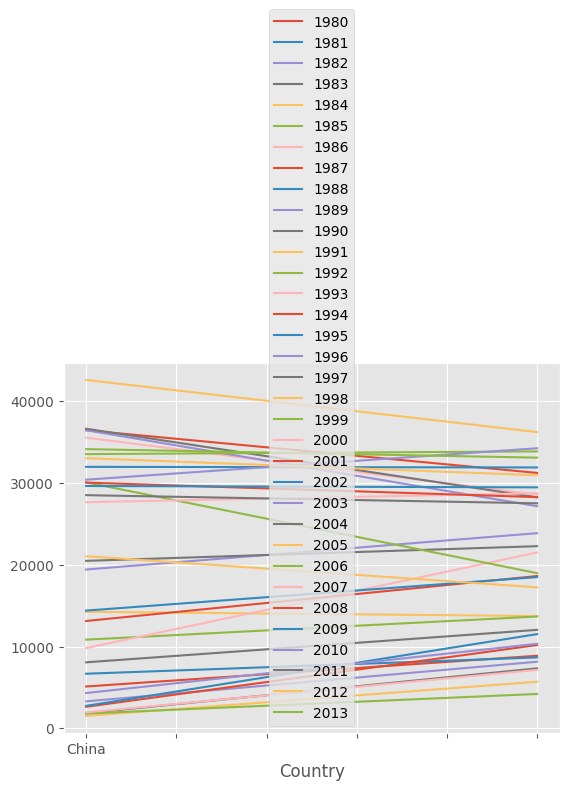

In [42]:
df_ci.plot(kind='line')

That doesn't look right...

Recall that pandas plots the indices on the x-axis and the columns as individual lines on the y-axis. Since `df_ci` is a dataframe with the country as the index and years as the columns, we must first transpose the dataframe using transpose() method to swap the row and columns.

In [43]:
df_ci = df_ci.transpose() # swap the rows and columns
df_ci.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


*pandas* will auomatically graph the two countries on the same graph. Go ahead and plot the new transposed dataframe. Make sure to add a title to the plot and label the axes.

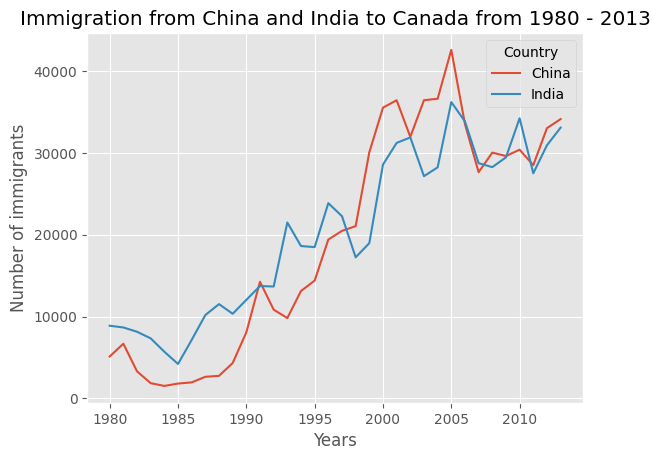

In [45]:
df_ci.plot(kind='line')

plt.title('Immigration from China and India to Canada from 1980 - 2013')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show()

From the above plot, we can observe that the China and India have very similar immigration trends through the years.

Note: How come we didn't need to transpose `Haiti`'s dataframe before plotting (like we did for `df_ci`)?

That's because `haiti` is a series as opposed to a dataframe, and has the years as its indices as shown below.
```python
print(type(haiti))
print(haiti.head(5))
```
>class 'pandas.core.series.Series'<br>
>1980 1666<br>
>1981 3692<br>
>1982 3498<br>
>1983 2860<br>
>1984 1418<br>
>Name: Haiti, dtype: int64<br>

Line plot is a handy tool to display several dependent variables against one independent variable. However, it is recommended that no more than 5-10 lines on a single graph; any more than that and it becomes difficult to interpret.

**Question**: Compare the trend of top 5 countries that contributed the most to immigration to Canada.

In [50]:
# sort dataframe on 'Total' column
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)
top5_countries = df_can.head() # top 5 countries

# extract only country and years, and then transpose the dataframe
top5_countries = top5_countries[years].transpose()
top5_countries.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


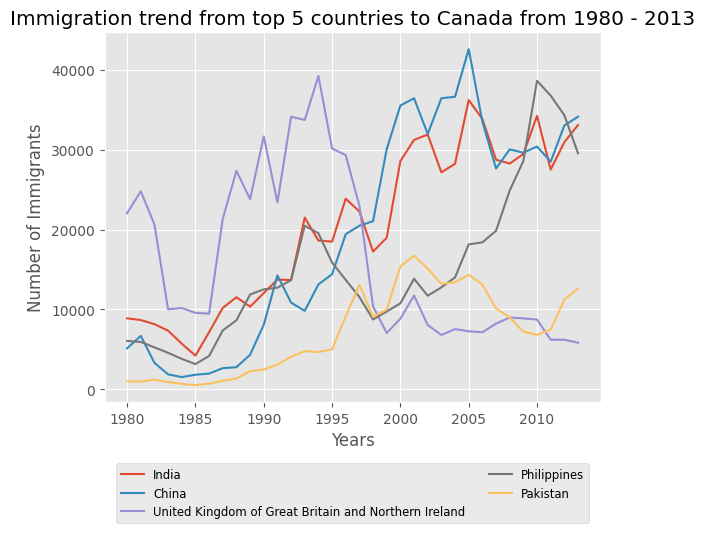

In [64]:
top5_countries.plot(kind='line')

plt.title('Immigration trend from top 5 countries to Canada from 1980 - 2013')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

# Setting up the legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, fontsize='small')

plt.show()

In [75]:
top5_countries

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668
1985,4211,1816,9564,3150,514
1986,7150,1960,9470,4166,691
1987,10189,2643,21337,7360,1072
1988,11522,2758,27359,8639,1334
1989,10343,4323,23795,11865,2261


### Other Plots

Congratulations! you have learned how to wrangle data with python and create a line plot with Matplotlib. There are many other plotting styles available other than the default Line plot, all of which can be accessed by passing `kind` keyword to `plot()`. The full list of available plots are as follows:

* `bar` for vertical bar plots
* `barh` for horizontal bar plots
* `hist` for histogram
* `box` for boxplot
* `kde` or `density` for density plots
* `area` for area plots
* `pie` for pie plots
* `scatter` for scatter plots
* `hexbin` for hexbin plot

### Thank you for completing this lab!